In [1]:
#Import Libraries

%matplotlib inline
from simulation import *
from scipy.special import comb
import numpy as np

Generating mGraph
----- DONE
Getting layout
----- DONE
Setting default attributes
----- DONE
Choosing the source
----- DONE
Choosing the monitoring nodes
----- DONE
Mlist :  [22, 6, 13, 8, 38] 
Slist :  [39]


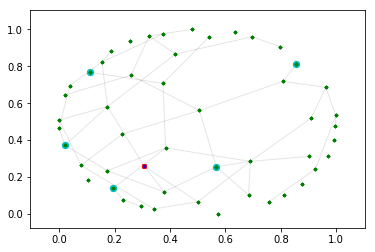

Starting infection


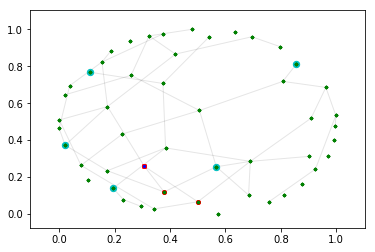

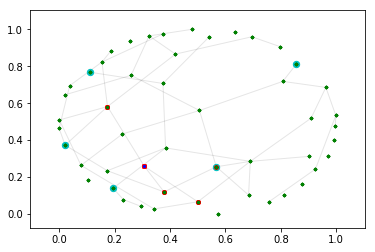

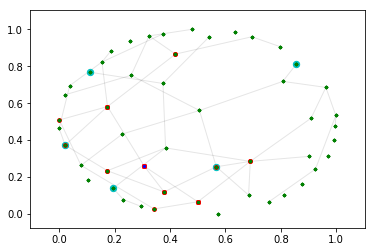

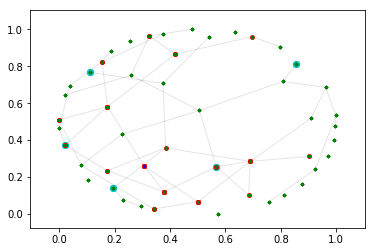

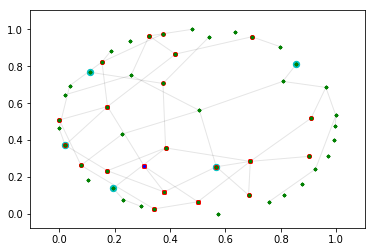

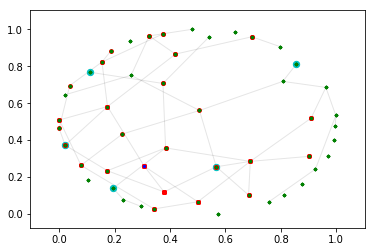

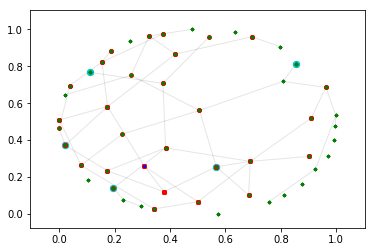

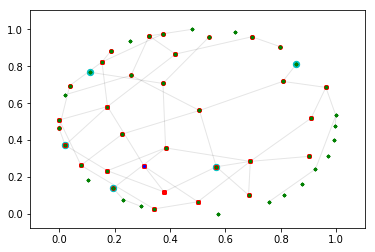

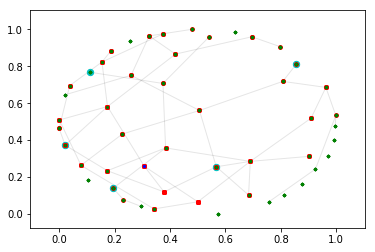

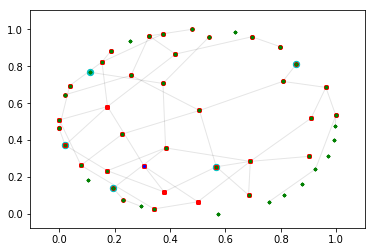

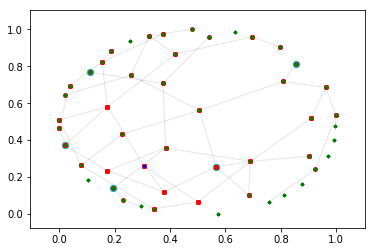

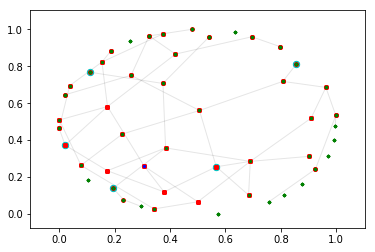

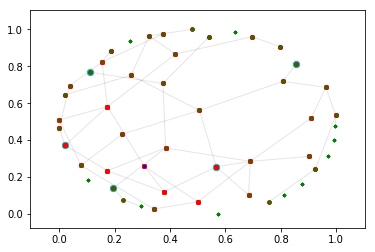

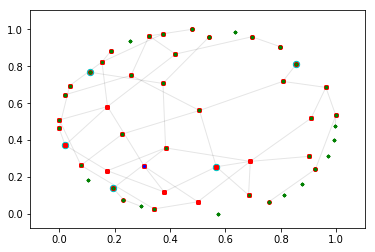

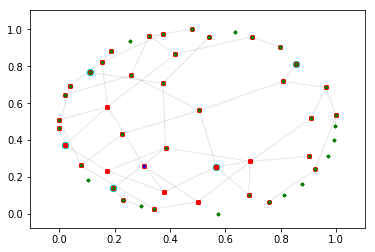

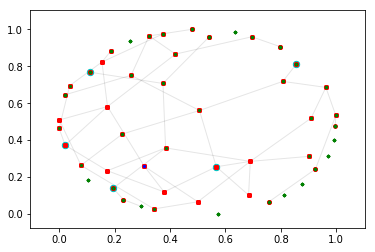

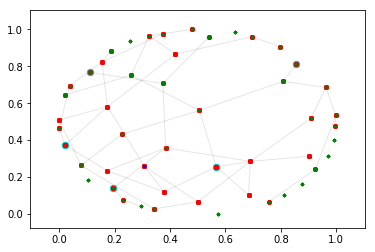

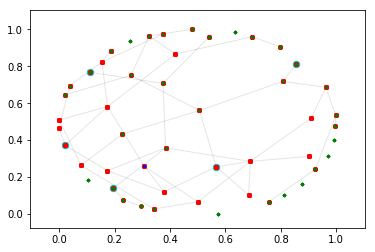

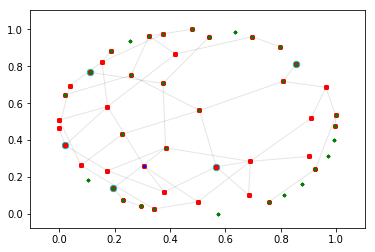

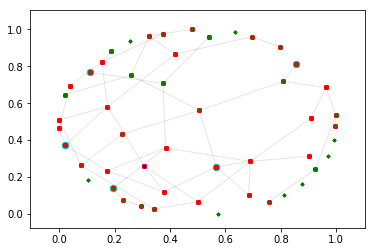

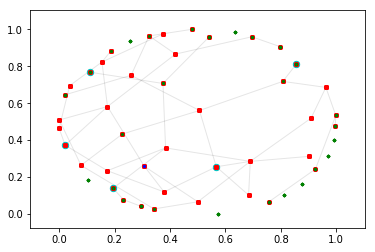

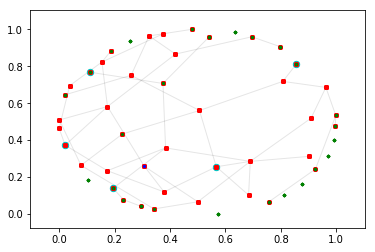

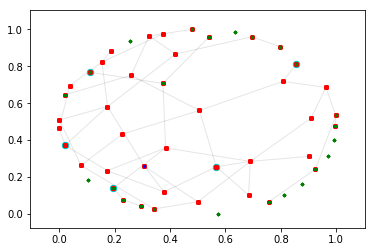

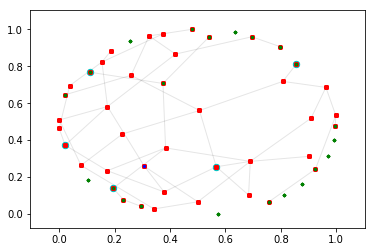

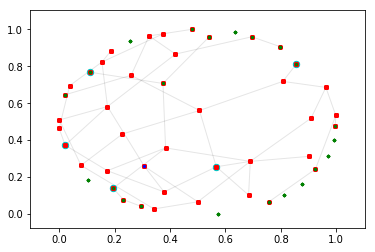

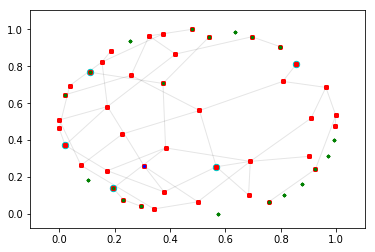

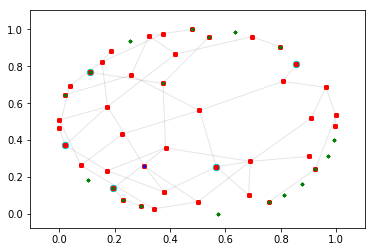

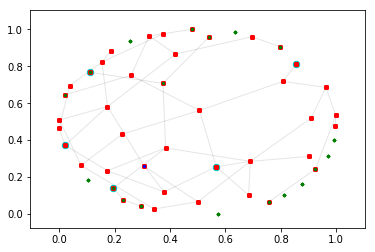

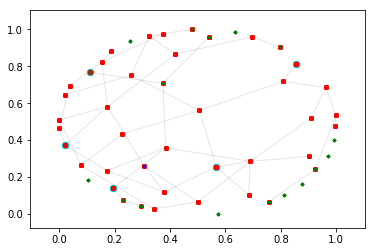

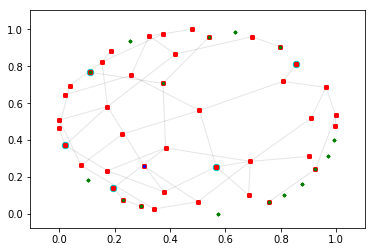

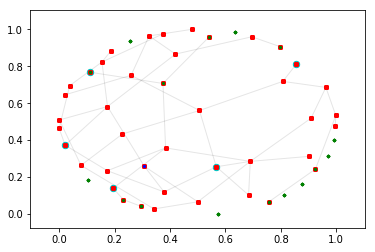

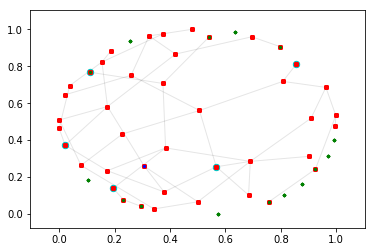

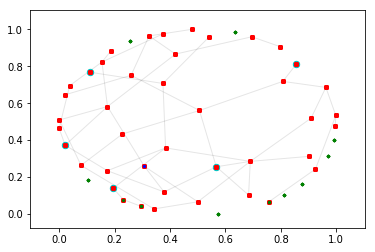

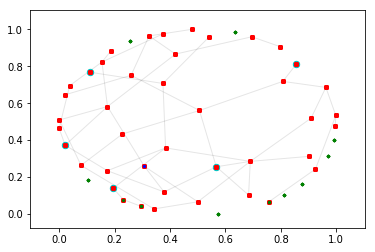

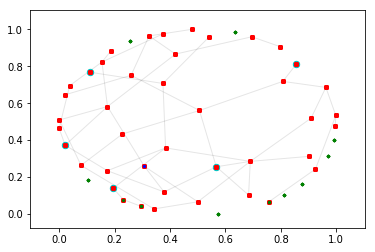

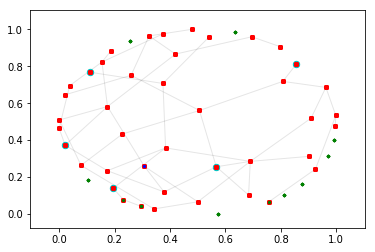

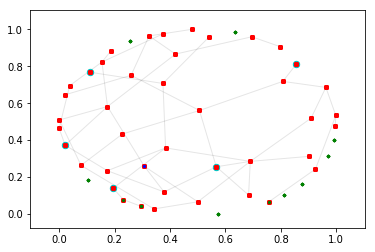

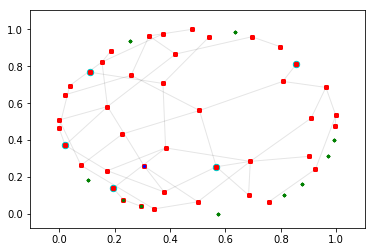

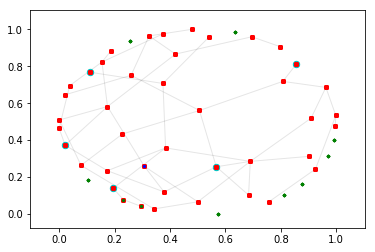

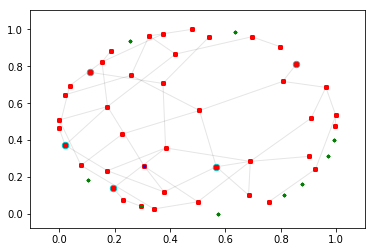

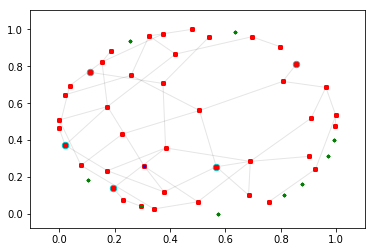

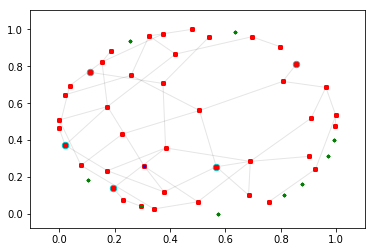

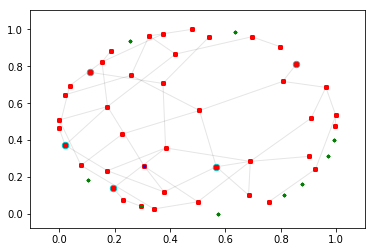

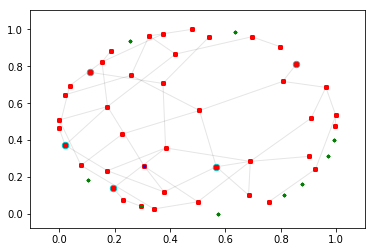

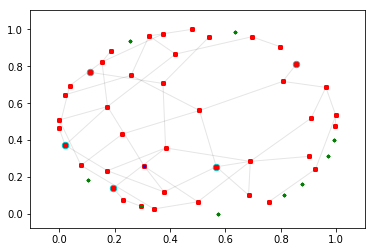

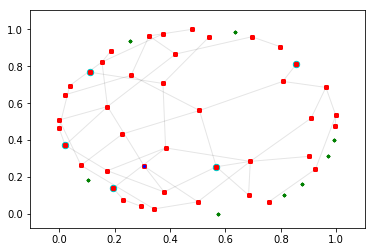

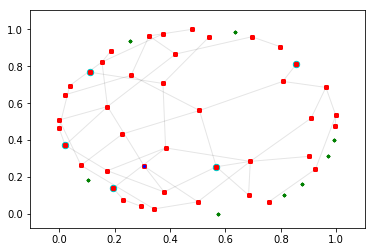

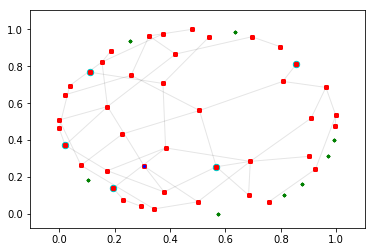

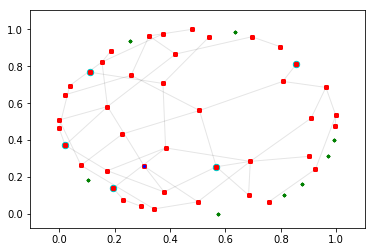

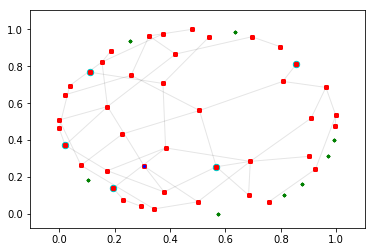

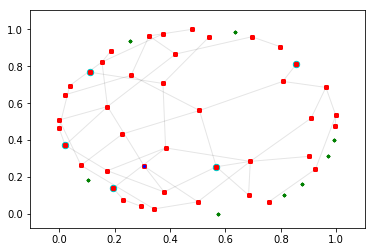

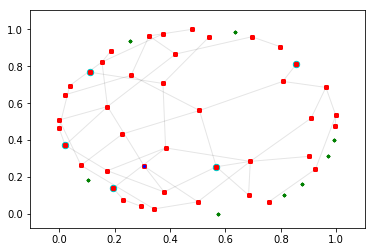

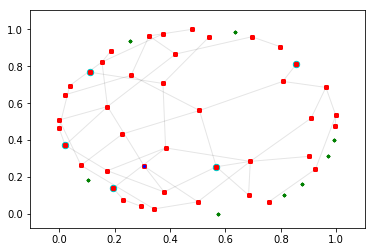

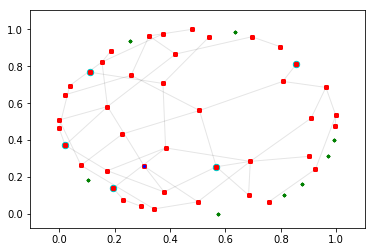

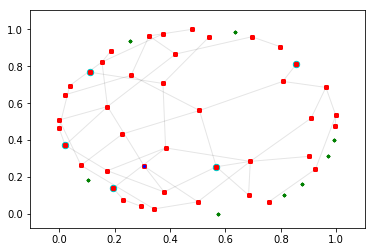

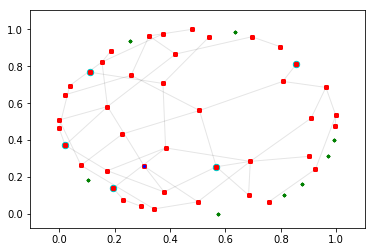

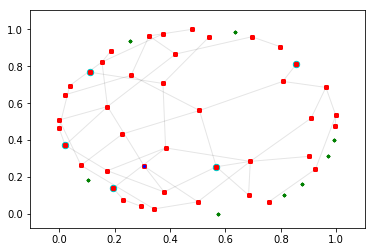

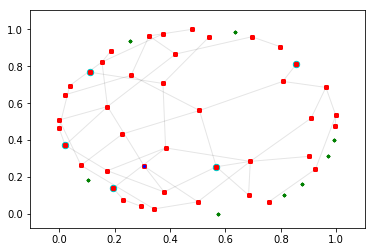

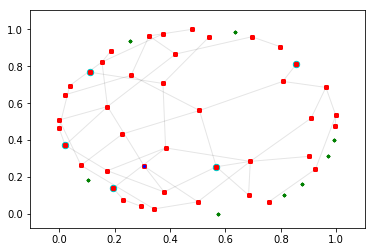

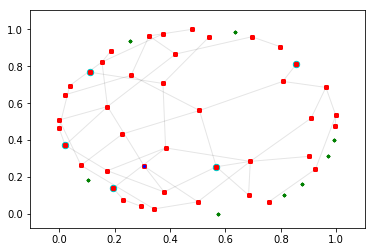

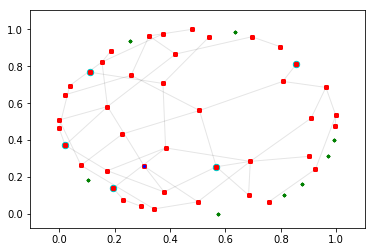

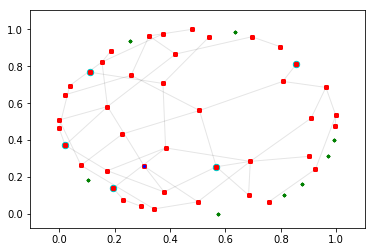

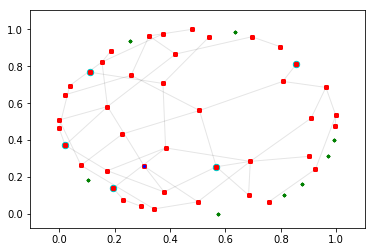

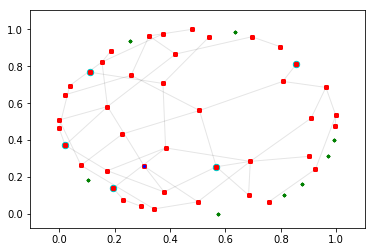

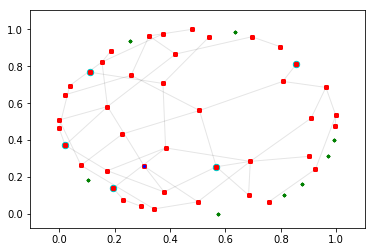

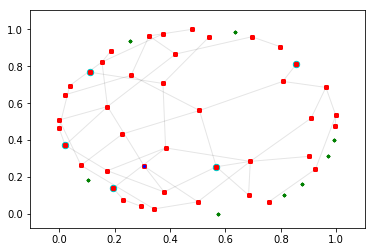

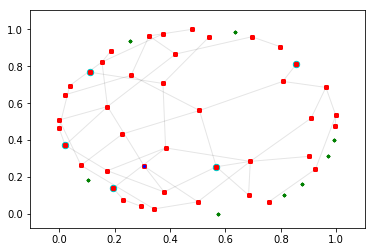

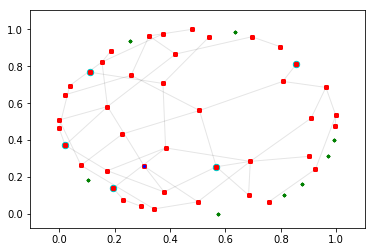

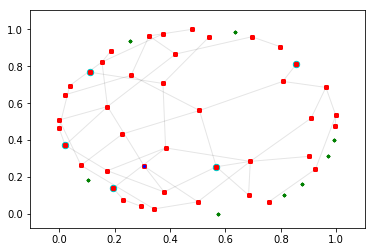

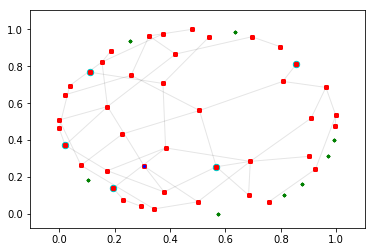

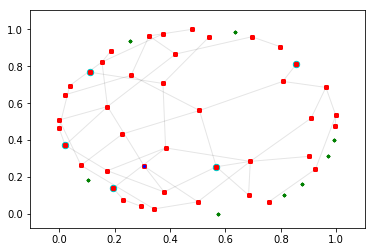

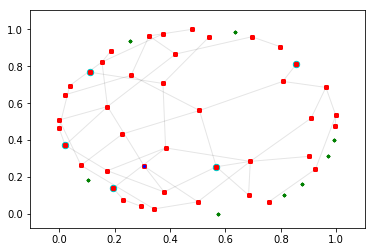

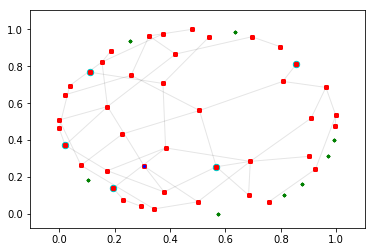

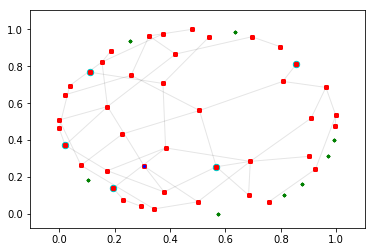

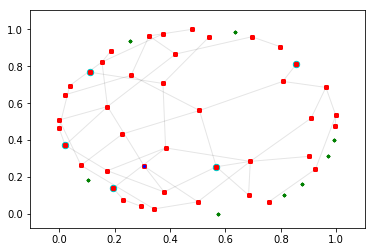

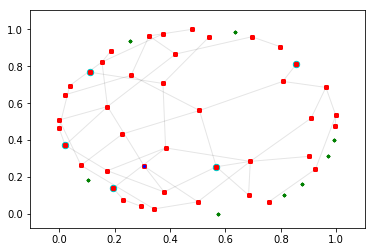

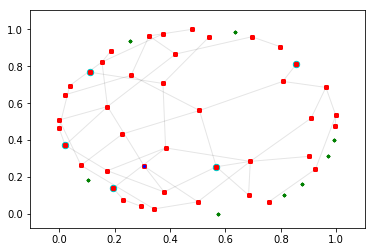

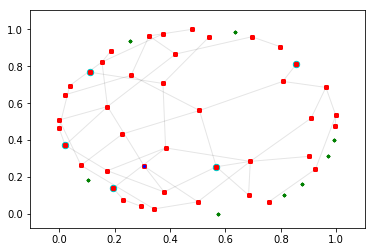

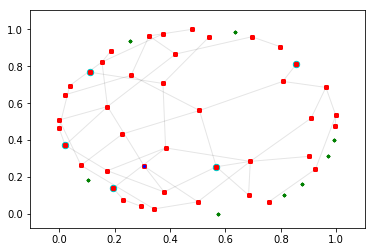

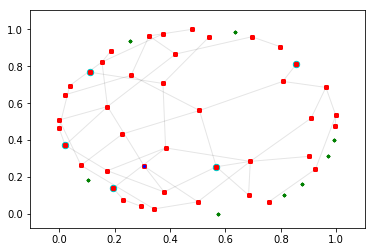

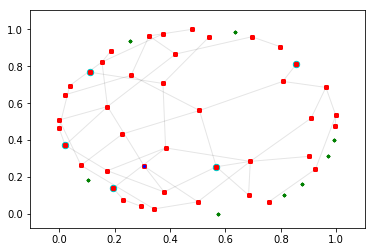

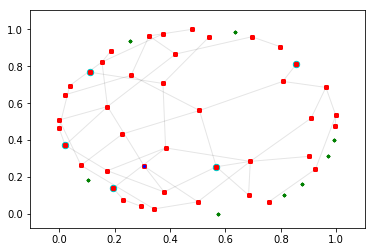

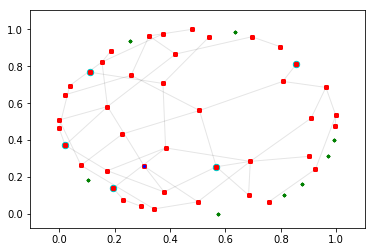

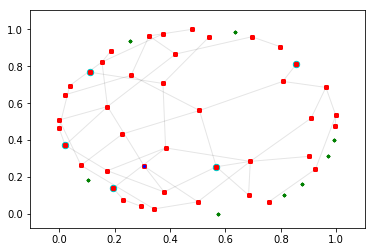

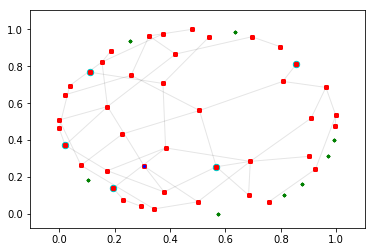

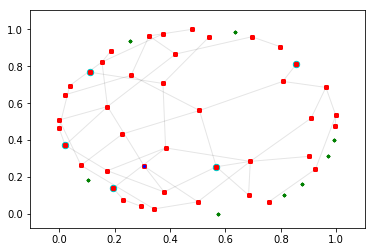

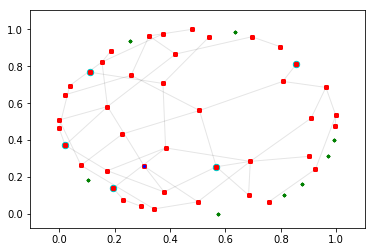

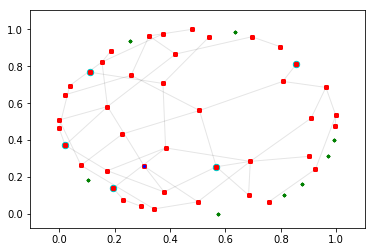

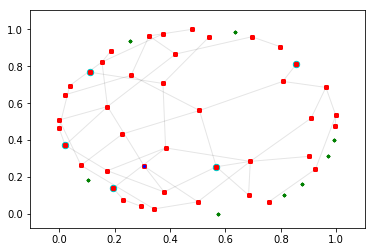

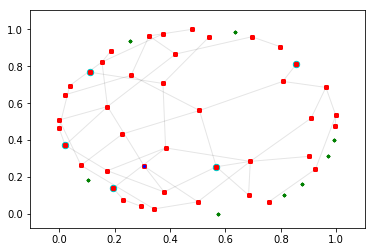

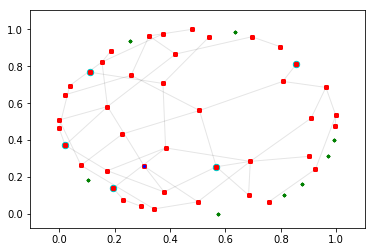

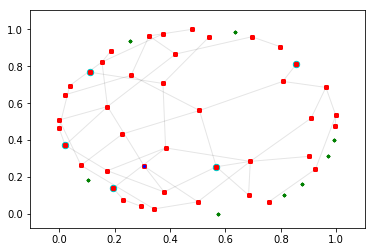

KeyboardInterrupt: 

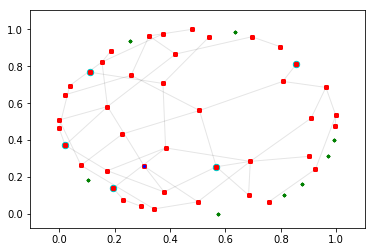

In [2]:
#Run the simulation

figureList = list()
# Parameters definition
numRumors = 10
maxThreshold = 1
numMonitors = 5
propagProba = 0.2
numNodes = 50
linkProba = 0.2
monitorTrigger = list()
numStep = 100

j=0

Graph, Pos, rumorSources, monitorsList = generateGraphReady(numNodes,linkProba,maxThreshold,numRumors,numMonitors)
fig1 =  drawColoredGraph(Graph, Pos, numRumors, rumorSources, monitorsList)
#fig1.savefig('./TestFigs/figT'+str(j)+'.png')
print("Starting infection")
infections = [[] for n in range(numRumors)]
infected = getInfectedList(Graph,numRumors)

while(not isAllInfected(Graph,numRumors)):

    Graph = infectionForward(Graph, propagProba, numRumors)
    infected = getInfectedList(Graph,numRumors)
    # j+1 because j=0 is step 1
    monitorTrigger = updateMonitorTrig(j+1,monitorTrigger,monitorsList,Graph,numRumors)
    j += 1
    fig2 = drawColoredGraph(Graph, Pos, numRumors, rumorSources, myMonitors=monitorsList,myIndex=j)
    
monitorTrigger2 = sorted(monitorTrigger, key=lambda x : (x[0], x[2]))
print("DONE")

Real Source =  6
Detected Source =  [41, 6, 39]


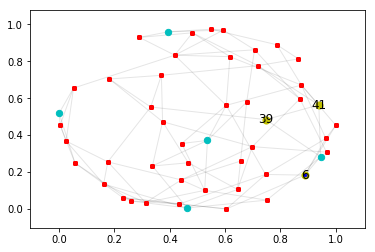

In [4]:
# Test with sets of nodes intersections
setList = []

for i in monitorTrigger:
    nodeSet = findSet2(Graph,i[0],i[2])
    setList.append(nodeSet)
    
finalSet = set.intersection(*setList)
print("Real Source = ",rumorSources[0])
print("Detected Source = ",list(finalSet))
finalList = list(finalSet)


fig = drawColoredGraph2(Graph,Pos,numRumors,rumorSources,monitorsList,finalList)
#fig.savefig('./TestFigs/figEND'+'png')

In [8]:
#

# Compute the probability that a monitor is infected by n steps by the possible sources.
sourceDict ={}

for source in finalList:
    sourceDict[source] = 0

for mInfo in monitorTrigger2:
    #print("Monitor ",mInfo[0]," :")
    for source in finalList:
        prb = calculProba(propagProba,len(nx.shortest_path(Graph,source,mInfo[0]))-1,mInfo[2])
        sourceDict[source]+=prb
        #print("Infected by node ",source," in ",mInfo[2]," steps with proba : ",prb)
        
 
 
       
scoreList = sorted(sourceDict,key=sourceDict.__getitem__,reverse=True)
#print(sourceDict)
#print(scoreList)
#print("position of the real source :", scoreList.index(*rumorSources)+1)
#print("number of candidates : ",len(scoreList))

In [10]:
# C

# Compute the dictionnary of the path length for each possible sources to all the monitoring nodes
pathDict = {}

for source in finalList :
    #print('\n source : ',source,': \n')
    tempoDict = {}
    for target in monitorsList :
        #print(target,' : ',len(nx.shortest_path(Graph,source,target))-1)
        tempoDict[target] = len(nx.shortest_path(Graph,source,target))-1
    pathDict[source] =  tempoDict

# Compute number of steps in wich the monitor have been infected  
realSourceDict = {}
for i in range(int(len(monitorTrigger2)/numRumors)):
    #print('Monitor node : ', monitorTrigger2[i*numRumors][0],' path : ',monitorTrigger2[i*numRumors][2])
    realSourceDict[monitorTrigger2[i*numRumors][0]] = monitorTrigger2[i*numRumors][2]

{13: 9, 23: 5, 32: 8, 40: 1, 46: 10}